# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from IPython.core.display import display, HTML
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

C:\Users\sarva\AppData\Local\Temp\ipykernel_4128\1120016000.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="Bitcoin AND bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


print(f"Total number of news articles featuring Bitcoin, bitcoin or BTC - {bitcoin_articles['totalResults']}")       #Check for total no doc pulled - check for data
print(f"Sample news article featuring Bitcoin, bitcoin or BTC - {bitcoin_articles['articles'][1:3]}")                #Print 1 to 3 articles

Total number of news articles featuring Bitcoin, bitcoin or BTC - 2943
Sample news article featuring Bitcoin, bitcoin or BTC - [{'source': {'id': None, 'name': 'Bitcoin.com'}, 'author': None, 'title': 'Bitcoin, Ethereum Technical Analysis: BTC Slips to 10-Month Low, Below $33000 – Market Updates Bitcoin News - Bitcoin News', 'description': '<ol><li>Bitcoin, Ethereum Technical Analysis: BTC Slips to 10-Month Low, Below $33000 – Market Updates Bitcoin News\xa0\xa0Bitcoin News\r\n</li><li>Bitcoin drops 50% from peak, near lowest levels in last one year\xa0\xa0Economic Times\r\n</li><li>Crypto Crash: Why is cryptoc…', 'url': 'https://news.bitcoin.com/bitcoin-ethereum-technical-analysis-btc-slips-to-10-month-low-below-33000/', 'urlToImage': 'https://static.news.bitcoin.com/wp-content/uploads/2022/05/shutterstock_1978798856-1.jpg', 'publishedAt': '2022-05-09T13:45:30Z', 'content': 'BTC fell to its lowest level since last July, as prices dropped below $33,000 to start the week. The selloff in

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="Ethereum AND ethereum AND ETH",
    language='en',
    page_size=100,
    sort_by="relevancy"
)


print(f"Total number of news articles featuring Ethereum, ethereum or ETH - {ethereum_articles['totalResults']}")     #Check for total no doc pulled - check for data
print(f"Sample news article featuring Bitcoin, bitcoin or BTC - {ethereum_articles['articles'][1:3]}")                #Print 1 to 3 articles

Total number of news articles featuring Ethereum, ethereum or ETH - 1542
Sample news article featuring Bitcoin, bitcoin or BTC - [{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Alex Hern', 'title': 'Yuga Labs apologises after sale of virtual land crashes Ethereum', 'description': 'Demand for plots of land in multiplayer game Otherside was so high it overwhelmed the Ethereum blockchainA multi-billion dollar cryptocurrency company has apologised to users after its sale of “metaverse land” sparked a frenzy that temporarily brought down th…', 'url': 'https://amp.theguardian.com/technology/2022/may/02/yuga-labs-apologises-after-sale-of-virtual-land-crashes-ethereum', 'urlToImage': 'https://i.guim.co.uk/img/media/e6382b02449503a6456ab870dbc394d5752212ad/0_117_3500_2101/master/3500.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=c33681237b4c480f

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []                                       # List variable to hold the values

for article in bitcoin_articles["articles"]:                  # Get required details from articles 
    try:
        title = article["title"]                              # Title
        text = article["content"].lower()                     # Content in lower case        
        date = article["publishedAt"][:10]                    # Published date
        sentiment = analyzer.polarity_scores(text)            # calculate polarity scores based on text using analyzer()
        compound = sentiment["compound"]                      # Extract compound score from calculated polarity scores
        pos = sentiment["pos"]                                # Extract positive score from calculated polarity scores
        neu = sentiment["neu"]                                # Extract negative score from calculated polarity scores
        neg = sentiment["neg"]                                # Extract neutral score from calculated polarity scores
        
        bitcoin_sentiments.append({                           # Add composed articles to the list as DICTs
            "Title"   : title, "Text"    : text,
            "Date"    : date,  "Compound": compound,
            "Positive": pos,   "Negative": neg,
            "Neutral" : neu,
            
        })
        
    except AttributeError:
        pass
    

df_bitcoin_sentiments = pd.DataFrame(bitcoin_sentiments)     # Convert to DataFrame
df_bitcoin_sentiments.head()                                 # Check the DataFrame 

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,Miami’s Bitcoin Conference Left a Trail of Har...,"now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964
1,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859
2,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757
3,Protecting Retirement Savings from Volatile Cr...,did you hear? you may be able to allocate some...,2022-05-09,0.1280,0.045,0.000,0.955
4,3 Reddit Stocks That Could Roar in Q2,<ul><li>elon musk will be able to focus on tes...,2022-04-19,0.4404,0.079,0.000,0.921


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments  = []                                     # List variable to hold the values

for article in ethereum_articles["articles"]:                 # Get required details from articles 
    try:
        title = article["title"]                              # Title
        text = article["content"].lower()                     # Content in lower case        
        date = article["publishedAt"][:10]                    # Published date
        sentiment = analyzer.polarity_scores(text)            # calculate polarity scores based on text using analyzer()
        compound = sentiment["compound"]                      # Extract compound score from calculated polarity scores
        pos = sentiment["pos"]                                # Extract positive score from calculated polarity scores
        neu = sentiment["neu"]                                # Extract negative score from calculated polarity scores
        neg = sentiment["neg"]                                # Extract neutral score from calculated polarity scores
        
        ethereum_sentiments.append({                          # Add composed articles to the list as DICTs
            "Title": title,
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
    
df_ethereum_sentiments = pd.DataFrame(ethereum_sentiments)    # Convert to DataFrame
df_ethereum_sentiments.head()                                 # Check the DataFrame 

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,US blames North Korean hacker group for $625 m...,the us department of treasury says lazarus is ...,2022-04-14,-0.7845,0.088,0.231,0.681
1,Yuga Labs apologises after sale of virtual lan...,a multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879
2,How Bored Ape Yacht Club Broke Ethereum - CNET,when bored ape yacht club creators yuga labs a...,2022-05-04,-0.2732,0.000,0.055,0.945
3,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859
4,How the BAYC metaverse mint raised Ethereum ga...,if you ever wanted to buy an nft based on ethe...,2022-05-02,-0.1027,0.000,0.036,0.964


In [8]:
# Describe the Bitcoin Sentiment
df_bitcoin_sentiments.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.067595,0.066590,0.050540,0.882900
std,0.424559,0.062592,0.063473,0.082491
min,-0.796400,0.000000,0.000000,0.608000
25%,-0.226300,0.000000,0.000000,0.827000
50%,0.102700,0.060500,0.019500,0.890500
75%,0.401900,0.094500,0.070000,0.948000
max,0.838700,0.240000,0.224000,1.000000


In [9]:
# Describe the Ethereum Sentiment
df_ethereum_sentiments.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.144582,0.07851,0.042560,0.878940
std,0.416823,0.06621,0.055872,0.081601
min,-0.784500,0.00000,0.000000,0.635000
25%,-0.190000,0.00000,0.000000,0.828500
50%,0.202300,0.07400,0.016500,0.887000
75%,0.476700,0.12250,0.066000,0.930250
max,0.893400,0.33200,0.231000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest Mean Positive score of 0.077630

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.893400

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.33200

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'say', 'sent', 'go', 'wa', 'k', 'u', 'week', 'x', 'also', 'char','ha', 'th', 'b'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")                  # Define the regex parameters
    re_clean = regex.sub('', text)                    # Apply regex parameters to article
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    word_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    output = [word.lower() for word in word_lower if word.lower() not in sw]
    output1 = [word.lower() for word in output if word.lower() not in sw_addons]
    
    return output1  

In [13]:
# Create a new tokens column for Bitcoin
df_bitcoin_tokens = df_bitcoin_sentiments.copy()                 # Create a variable like df_bitcoin_sentiments
tokenized = []                                                   # Variable to hold the tokenized values

for article in df_bitcoin_sentiments['Text']:                    # Tokenize the values in Title column
    tokenized_articles = tokenizer(article)                      # Using tokenizer function to tokenize the article
    tokenized.append({'tokens':tokenized_articles})              # Append all tokens to the tokenized list of dicts

    
df_bitcoin_tokens['Tokens'] = pd.DataFrame(tokenized)            # Combine the Tokens dataframe with the original
df_bitcoin_tokens.head()                                         # Display the values


,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."
2,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757,"[contagion, spreading, stock, market, investor..."
3,Protecting Retirement Savings from Volatile Cr...,did you hear? you may be able to allocate some...,2022-05-09,0.1280,0.045,0.000,0.955,"[hear, may, able, allocate, retirement, saving..."
4,3 Reddit Stocks That Could Roar in Q2,<ul><li>elon musk will be able to focus on tes...,2022-04-19,0.4404,0.079,0.000,0.921,"[ullielon, musk, able, focus, onteslatsla, pro..."


In [14]:
# Create a new tokens column for Ethereum
df_ethereum_tokens = df_ethereum_sentiments.copy()               # Create a variable like df_bitcoin_sentiments
tokenized = []                                                   # Variable to hold the tokenized values

for article in df_ethereum_sentiments['Text']:                   # Tokenize the values in Title column
    tokenized_articles = tokenizer(article)                      # Using tokenizer function to tokenize the article
    tokenized.append({'tokens':tokenized_articles})              # Append all tokens to the tokenized list of dicts

    
df_ethereum_tokens['Tokens'] = pd.DataFrame(tokenized)           # Combine the Tokens dataframe with the original
df_ethereum_tokens.head()                                        # Display the values


,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,US blames North Korean hacker group for $625 m...,the us department of treasury says lazarus is ...,2022-04-14,-0.7845,0.088,0.231,0.681,"[department, treasury, lazarus, behind, attack..."
1,Yuga Labs apologises after sale of virtual lan...,a multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,How Bored Ape Yacht Club Broke Ethereum - CNET,when bored ape yacht club creators yuga labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, lab, ..."
3,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."
4,How the BAYC metaverse mint raised Ethereum ga...,if you ever wanted to buy an nft based on ethe...,2022-05-02,-0.1027,0.000,0.036,0.964,"[ever, wanted, buy, nft, based, ethereum, woul..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in df_bitcoin_tokens["Tokens"]]
bitcoin_bigrams[1]         #Show first value

Counter({('btc', 'fell'): 1,
         ('fell', 'lowest'): 1,
         ('lowest', 'level'): 1,
         ('level', 'since'): 1,
         ('since', 'last'): 1,
         ('last', 'july'): 1,
         ('july', 'price'): 1,
         ('price', 'dropped'): 1,
         ('dropped', 'start'): 1,
         ('start', 'selloff'): 1,
         ('selloff', 'cryptocurrency'): 1,
         ('cryptocurrency', 'started'): 1,
         ('started', 'last'): 1,
         ('last', 'following'): 1,
         ('following', 'fed'): 1,
         ('fed', 'decision'): 1,
         ('decision', 'hike'): 1,
         ('hike', 'interest'): 1,
         ('interest', 'rate'): 1})

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in df_ethereum_tokens["Tokens"]]
ethereum_bigrams[1]         #Show first value

Counter({('multibillion', 'dollar'): 1,
         ('dollar', 'cryptocurrency'): 1,
         ('cryptocurrency', 'company'): 1,
         ('company', 'apologised'): 1,
         ('apologised', 'user'): 1,
         ('user', 'sale'): 1,
         ('sale', 'metaverse'): 1,
         ('metaverse', 'land'): 1,
         ('land', 'sparked'): 1,
         ('sparked', 'frenzy'): 1,
         ('frenzy', 'temporarily'): 1,
         ('temporarily', 'brought'): 1,
         ('brought', 'ethereum'): 1,
         ('ethereum', 'cryptocurrencyyuga'): 1,
         ('cryptocurrencyyuga', 'lab'): 1,
         ('lab', 'comp'): 1})

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_all_tokens = []                                    # List variable to hold all torkens

for tokens in df_bitcoin_tokens["Tokens"]:                 # Loop through all articles in column -> Tokens
    bitcoin_all_tokens += tokens                           # and add to variable bitcoin_all_tokens

bitcoin_top10_words = token_count(bitcoin_all_tokens, 10)  # Use the function token_count to get top 10 words
bitcoin_top10_words                                        # Display the extracted value

[('bitcoin', 49),
 ('cryptocurrency', 33),
 ('btc', 30),
 ('market', 25),
 ('price', 22),
 ('cryptocurrencies', 19),
 ('crypto', 18),
 ('asset', 15),
 ('investor', 13),
 ('world', 13)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
ethereum_all_tokens = []                                     # List variable to hold all torkens

for tokens in df_ethereum_tokens["Tokens"]:                  # Loop through all articles in column -> Tokens
    ethereum_all_tokens += tokens                            # and add to variable bitcoin_all_tokens

ethereum_top10_words = token_count(ethereum_all_tokens, 10)  # Use the function token_count to get top 10 words
ethereum_top10_words    

[('cryptocurrency', 25),
 ('ethereum', 25),
 ('crypto', 21),
 ('market', 20),
 ('cryptocurrencies', 18),
 ('eth', 15),
 ('token', 14),
 ('investor', 13),
 ('asset', 13),
 ('nft', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

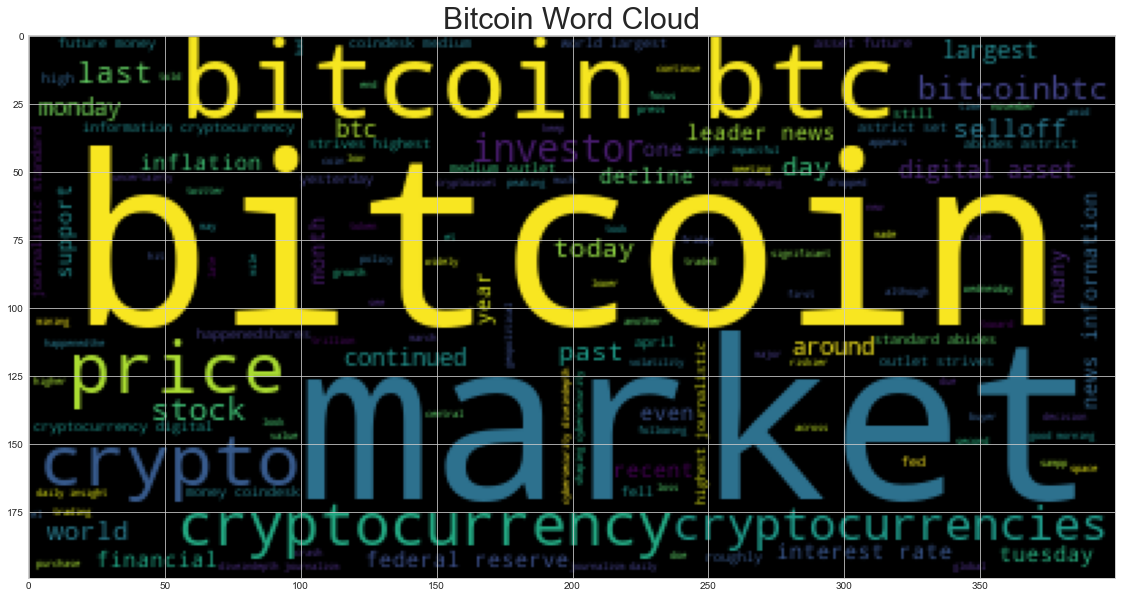

In [22]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_all_tokens)                # Create one big string
bitcoin_word_cloud = WordCloud().generate(bitcoin_string)    # Generate the word cloud objext
plt.imshow(bitcoin_word_cloud)                               # Generate the graph
plt.title("Bitcoin Word Cloud", fontsize=30)                 # Add title to the graph
plt.savefig('../Images/Bitcoin_Word_Cloud.png')              # Save the graph as .png
plt.show()                                                   # Show the graph

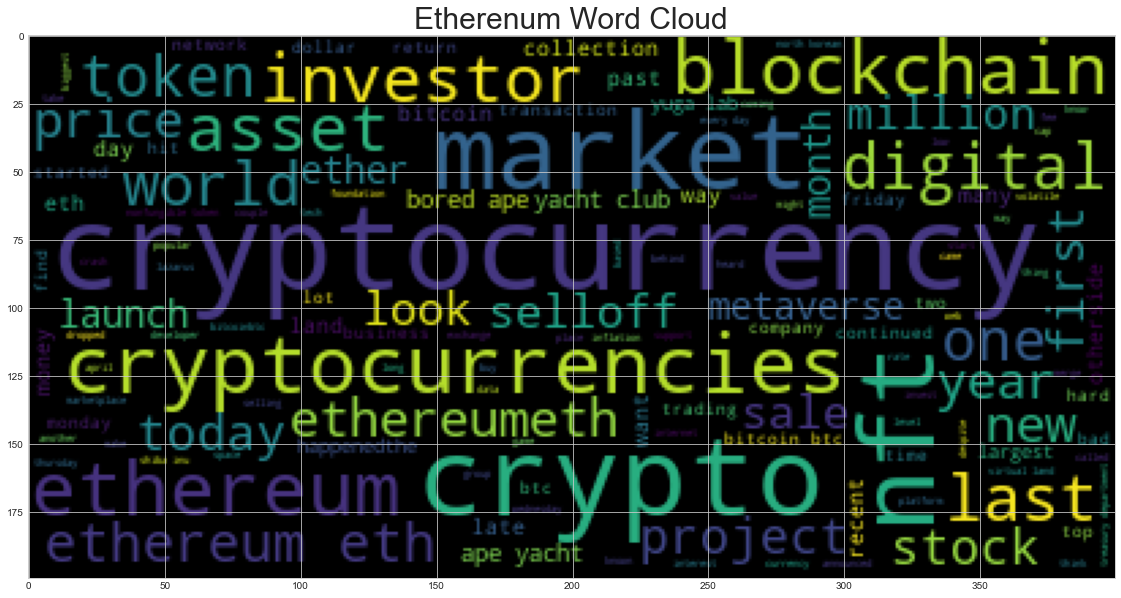

In [23]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_all_tokens)              # Create one big string
ethereum_word_cloud = WordCloud().generate(ethereum_string)  # Generate the word cloud objext
plt.imshow(ethereum_word_cloud)                              # Generate the graph
plt.title("Etherenum Word Cloud", fontsize=30)               # Add title to the graph
plt.savefig('../Images/Etherenum_Word_Cloud.png')            # Save the graph as .png
plt.show()                                                   # Show the graph


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = []                                      # Variable to hold the extraxted text value

for text in df_bitcoin_tokens['Text']:                 # Loop through tokenized df in column -> 'Text'
    bitcoin_text.append(text)                          # Add the that text to variable

bitcoin_all_text_string = ' '.join(bitcoin_text)       # convert the list variable into one long string

In [28]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all_text_string)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
bitcoin_html = displacy.render(bitcoin_ner, style='ent', jupyter=False)  # Create the visualization
output_path = Path("../images/Bitcoin_NER.html")                         # Set output path
output_path.open("w", encoding="utf-8").write(bitcoin_html)              # write the visualization to a file
display(HTML(bitcoin_html))                                              # Display the visualization

In [30]:
# List all Entities
bitcoin_ents = set([ent.text for ent in bitcoin_ner.ents ])
bitcoin_ents

{'$20 billion',
 '$9 trillion',
 '+3115',
 '+3273 chars',
 '+7149',
 '-0.09%',
 '-0.29%',
 '-0.32%',
 '-1',
 '-2.45%',
 '-3.48%',
 '-5.72%',
 '-6.62%',
 '0.09%',
 '0.24%',
 '0.25%',
 '0.37%',
 '0.67%',
 '1,000',
 '1.10%',
 '1.14%',
 '1.22%',
 '1.47%',
 '1.49%',
 '10',
 '10%',
 '10,000',
 '100-week',
 '11%',
 '11:30 a.m.',
 '12.6%',
 '13 per cent',
 '2%',
 '2.45%',
 '2.52%',
 '2.72%',
 '2.73%)(brk.b',
 '2.76%',
 '20',
 '2013',
 '2019',
 '2021',
 '2022',
 '21 million',
 '22%',
 '23%',
 '25,402',
 '26.6%',
 '2:02 p.m.',
 '3.34%',
 '30',
 '30,000',
 '33,000',
 '34,500',
 '35,000',
 '37,500',
 '38,547',
 '4.03%',
 '4.81%',
 '40,000',
 '43,000',
 '43,400',
 '45,000,000%',
 '5',
 '50',
 '500',
 '52.1%',
 '6',
 '70%',
 '8.00',
 '96%',
 '9:45',
 'a little over $38,000',
 'a new month',
 'a rough week',
 'a week',
 'a wild weekend',
 'about $38,000',
 'about $38,500',
 'about 50%',
 'above $40,000 later',
 "african republic's",
 'afternoon',
 'almost a month',
 'approximately 8%',
 'april 14, 20

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = []                                      # Variable to hold the extraxted text value

for text in df_ethereum_tokens['Text']:                 # Loop through tokenized df in column -> 'Text'
    ethereum_text.append(text)                          # Add the that text to variable

ethereum_all_text_string = ' '.join(ethereum_text)      # convert the list variable into one long string

In [32]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all_text_string)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
ethereum_html = displacy.render(ethereum_ner, style='ent', jupyter=False)   # Create the visualization
output_path = Path("../images/Ethereum_NER.html")                           # Set output path
output_path.open("w", encoding="utf-8").write(ethereum_html)                # write the visualization to a file
display(HTML(ethereum_html))                                                # Display the visualization

In [34]:
# List all Entities
ethereum_ents = set([ent.text for ent in ethereum_ner.ents ])
ethereum_ents

{'$1.5 million',
 '$5.5 million',
 '$540 million',
 '$625 million',
 '$672 billion',
 '+3866',
 '+4056',
 '+4563',
 '+6669',
 '-0.29%',
 '-1.08%',
 '-1.11%',
 '-2.75%',
 '-21.76',
 '-26.40%',
 '-3.43%',
 '-4.76%',
 '-6.01%',
 '0.12%',
 '0.24%',
 '0.25%',
 '0.61%',
 '0.95%',
 '1.3%',
 '1.30%',
 '1.61b',
 '1.93%',
 '10',
 '10.51%',
 '10.54%',
 '11:30 a.m.',
 '16%',
 '16.02%',
 '1992',
 '2',
 '2,560%',
 '2.52%',
 '2.72%',
 '2013',
 '2014',
 '2018',
 '2019',
 '2021',
 '2022',
 '26%',
 '27.36%',
 '3.7%',
 '30',
 '33,000',
 '4.03%',
 '4.81%',
 '4/20',
 '45,000,000%',
 '5,500%',
 '5.59%',
 '500',
 '59906’',
 '8.00',
 '80%',
 '94',
 '96%',
 'a new month',
 'a rollercoaster month',
 'a rough week',
 'a wild weekend',
 'a year and a half ago',
 'afternoon',
 'aka hidden',
 'all day',
 'all eight',
 'another day',
 'april 11',
 'april 30',
 'august 20',
 'avax 1.41%',
 'bank of america',
 'bitcoin(crypto',
 'chris zook',
 'collection―',
 'daily',
 'dan robinson',
 'de-peg',
 'dis',
 'eighth',
 'e

---